Materials for my reference:

https://medium.com/@sds152/data-pre-processing-for-linear-regression-in-machine-learning-4b73ec48392a

https://www.linkedin.com/advice/0/what-common-preprocessing-steps-data-used-gwx5e

https://scikit-learn.org/1.5/modules/preprocessing.html

# Index:
1. [Import libraries and load data](#Import-libraries-and-load-data)
2. [Data Description](#Data-Description)

### EDA and Data preprocessing
1. [Check the data type of each column](#Check-the-data-type-of-each-column)
2. [Check the number of 1 and 0 in the target column in the dataset](#Check-the-number-of-1-and-0-in-the-target-column-in-the-dataset)
3. [Check for missing values and drop rows or columns](#Check-for-missing-values-and-drop-rows-or-columns)

a. [Drop column ps_car_03_cat](#Drop-column-ps_car_03_cat)   
b. [Drop rows missing ps_car_05_cat, or the column itself?](#Drop-rows-missing-ps_car_05_cat,-or-the-column-itself?)      
c. [Drop rows missing ps_reg_03, or the column itself?](#Drop-rows-missing-ps_reg_03,-or-the-column-itself?)      
d. [Drop rows missing ps_car_14, or the column itself?](#Drop-rows-missing-ps_car_14,-or-the-column-itself?)      
e. [Drop rows missing ps_ind_05_cat, or the column itself?](#Drop-rows-missing-ps_ind_05_cat,-or-the-column-itself?    )  
f. [Drop rows missing ps_car_07_cat, or the column itself?](#Drop-rows-missing-ps_car_07_cat,-or-the-column-itself?)


quick note: check unique before encoding data

g. [remove rows](#remove-rows)

4. [Check for duplicates](#Check-for-duplicates)  
5. [Encode categorical data](#Encode-categorical-data)  
6. [Correlation analysis: to determine whether linear regression is suitable](#Correlation-analysis-to-determine-whether-linear-regression-is-suitable)  
7. [Save the processed csv file](#Save-the-processed-csv-file)  

## Import libraries and load data

In [131]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df_original= pd.read_csv('C:/Users/Dell/Desktop/Mlda/Pronova Project/sdptrain.csv')
df_original.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Data Description
In this competition, you will: 
1. Predict the probability that an auto insurance policy holder files a claim.
2. Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
3. Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
4. Features without these designations are either continuous or ordinal.
5. Values of -1 indicate that the feature was missing from the observation.
6. The target columns signifies whether or not a claim was filed for that policy holder.

### Begin by exploring the data

### Check the data type of each column
logistic regression models expect numeric data

In [135]:
df_original.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

#### Note: according to bin: binary features and cat: categorical features
binary features
1. ps_ind_06_bin
2. ps_ind_07_bin
3. ps_ind_08_bin
4. ps_ind_09_bin
5. ps_ind_10_bin
6. ps_ind_11_bin
7. ps_ind_12_bin
8. ps_ind_13_bin
9. ps_ind_16_bin
10. ps_ind_17_bin
11. ps_ind_18_bin
12. ps_calc_15_bin
13. ps_calc_16_bin
14. ps_calc_17_bin
15. ps_calc_18_bin
16. ps_calc_19_bin
17. ps_calc_20_bin


categorical features
1. ps_ind_02_cat
2. ps_ind_04_cat
3. ps_ind_05_cat
4. ps_car_01_cat
5. ps_car_02_cat
6. ps_car_03_cat
7. ps_car_04_cat
8. ps_car_05_cat
9. ps_car_06_cat
10. ps_car_07_cat
11. ps_car_08_cat
12. ps_car_09_cat
13. ps_car_10_cat
14. ps_car_11_cat

#### Need dummy variables for these features          t64

### Check the number of 1 and 0 in the target column in the dataset

In [138]:
df_original['target'].value_counts(dropna = False)

target
0    573518
1     21694
Name: count, dtype: int64

#### Note: only 3.78% of the data is labeled as 1
#### Thus: The minority make up of 1-20% of the dataset (moderately imbalanced dataset)
For mildly imbalanced and some moderately imbalanced datasets, imbalance isn't a problem. 
Should first try training on the original dataset. 
If the model works well, you're done. 
If not, at least the suboptimal model provides a good baseline for future experiments. 
Afterwards, you can try
#### 1. Downsampling and Upweighting      2. Rebalance ratios 

Resource:

https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets#:~:text=In%20a%20balanced%20dataset%2C%20the,is%20called%20the%20minority%20class.

### Check for missing values and drop rows or columns
An assumption of logistic regression models is that there are no missing values.

From the data description:

5. Values of -1 indicate that the feature was missing from the observation.

In [141]:
pd.set_option('display.max_columns', None)  # Show all columns (check which features has the most null values)
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
df_original[(df_original == -1).any(axis=1)]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Note: 470281/(595212) = 0.79 (almost 80% of the rows have missing values)
#### Check if it's only (ps_car_03_cat) and (ps_car_05_cat) is the features which have the majority of the missing values

In [143]:
df_except_car03_05 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat'], inplace=False)  # inplace=True modifies the DataFrame directly
df_except_car03_05

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,0,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,0,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,0,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [144]:
df_except_car03_05[(df_except_car03_05 == -1).any(axis=1)]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
15,48,0,5,1,3,1,0,0,1,0,0,0,0,0,0,0,5,0,0,1,0.4,0.3,-1.000000,6,1,9,15,1,0,0,1,41,2,0.547723,1.719158,0.532917,3.741657,0.5,0.4,0.2,2,1,9,5,10,2,13,5,2,6,7,0,1,1,0,1,0
18,61,0,5,1,8,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.3,0.3,-1.000000,7,1,0,0,1,1,2,1,43,3,0.400000,0.668228,0.366333,2.828427,0.4,0.3,0.3,3,1,8,3,11,2,11,3,1,6,5,0,0,0,1,0,0
23,74,0,2,1,2,1,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0.2,0.2,-1.000000,6,1,0,0,1,1,0,1,95,2,0.400000,0.728734,0.401373,2.645751,0.3,0.7,0.6,2,1,8,3,10,2,4,7,1,3,9,0,1,0,1,0,0
25,78,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.1,0.2,-1.000000,4,1,8,11,1,1,0,1,24,2,0.529150,0.894751,0.527731,1.414214,0.5,0.7,0.6,2,2,9,4,10,4,9,6,4,4,4,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595194,1487976,0,0,1,7,1,0,0,1,0,0,0,0,0,0,0,12,0,0,0,0.1,0.1,-1.000000,7,1,0,11,1,1,2,1,57,2,0.374166,0.711955,0.328634,3.162278,0.3,0.4,0.1,1,2,4,4,10,6,7,6,1,4,12,0,1,1,0,0,0
595197,1487988,0,1,1,7,1,0,0,1,0,0,0,0,0,0,0,10,0,0,0,0.4,0.8,1.332291,11,1,1,3,1,1,2,1,102,2,0.400000,0.901938,-1.000000,3.605551,0.0,0.7,0.5,1,3,9,2,10,2,7,4,1,3,6,0,0,1,1,1,0
595199,1487992,0,3,1,3,1,0,0,0,1,0,0,0,0,0,0,13,1,0,0,0.7,0.3,0.779022,11,1,0,11,1,0,2,1,17,2,0.424264,1.055828,-1.000000,3.741657,0.7,0.9,0.4,1,2,9,3,9,3,9,1,1,1,10,0,0,1,0,1,0
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1


#### Still a lot of missing rows with missing data
Do further checking on every column, firstly by changing -1 or -1(float) into null, then calculate the percentage of rows w missing value over the total number of rows w.r.t one column, also check if there's any row with two or more missing values (ie, if sum > 470281 )

In [146]:
columns = [
    'id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 
    'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
    'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 
    'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 
    'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
    'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 
    'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 
    'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 
    'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 
    'ps_calc_19_bin', 'ps_calc_20_bin'
]

# Initialize cumulative count variable
total_rows_with_minus_one = 0

for i in columns:
    rows_with_minus_one = (df_original[i] == -1) | (df_original[i] == float(-1)) | (df_original[i] == str(-1))
    num_rows = rows_with_minus_one.sum()
    total_rows_with_minus_one += num_rows
    print(f"Column: {i:20} | Rows with -1: {(num_rows/595212)*100}")
    
print(f"\nTotal rows with -1 across all columns: {total_rows_with_minus_one}")


Column: id                   | Rows with -1: 0.0
Column: target               | Rows with -1: 0.0
Column: ps_ind_01            | Rows with -1: 0.0
Column: ps_ind_02_cat        | Rows with -1: 0.036289590935666624
Column: ps_ind_03            | Rows with -1: 0.0
Column: ps_ind_04_cat        | Rows with -1: 0.013944611331760785
Column: ps_ind_05_cat        | Rows with -1: 0.975954785857812
Column: ps_ind_06_bin        | Rows with -1: 0.0
Column: ps_ind_07_bin        | Rows with -1: 0.0
Column: ps_ind_08_bin        | Rows with -1: 0.0
Column: ps_ind_09_bin        | Rows with -1: 0.0
Column: ps_ind_10_bin        | Rows with -1: 0.0
Column: ps_ind_11_bin        | Rows with -1: 0.0
Column: ps_ind_12_bin        | Rows with -1: 0.0
Column: ps_ind_13_bin        | Rows with -1: 0.0
Column: ps_ind_14            | Rows with -1: 0.0
Column: ps_ind_15            | Rows with -1: 0.0
Column: ps_ind_16_bin        | Rows with -1: 0.0
Column: ps_ind_17_bin        | Rows with -1: 0.0
Column: ps_ind_18_bin

#### Findings:
1. The highest number of rows is missing the value in the ps_car_03_cat column
2. 846458 is almost double of 470281, ie there's a lot of rows with two or more missing values

#### Further steps to be taken:
1. For missing value percentage > 50% : Drop the column

     'more than half of the values are null and hence we can simply choose to delete the column'
   
3. For missing value percentage < 50% : Drop the rows

     'not the best practice because of the fact that data is information'

#### Before dropping the rows or columns: Check the types of missing values
1. How many (target = 1) rows have value in ps_car_03_cat

    (ie, how important is ps_car_03_cat in terms of affecting (target = 1) )   
2. Will dropping the rows affect (specifically, decrease) the ratio of (target=1) over (the total number of rows)

    (ie, accidentally delete those (target = 1 ) rows )


Resources:
https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62


#### Drop column ps_car_03_cat

In [149]:
df_rowswith_car03 = df_original[df_original['ps_car_03_cat']!=-1]
print(df_rowswith_car03.shape)
count_value_one_car03 = (df_rowswith_car03['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in ps_car_03_cat: {count_value_one_car03}")

(183981, 59)
Number of rows with value 1 in 'target' and value != Nulll in ps_car_03_cat: 8244


183981/595212 is about 0.309 = 1-0.69 = the rows which have values in  ps_car_03_cat

8244/183981 is about 0.044 these are the (rows with both target 1 and values in ps_car_03_cat) over (rows with values in ps_car_03_cat)

8244/595212 is about 0.014 out of the total number of rows

Only 3.78% of the rows in the total number of rows is labeled as 1

#### inference: the column ps_car_03_cat provide info for:
0.014/0.037 = 0.37 of the (target=1) rows of the dataset
##### Thus deleting this column will affect the prediction of 0.37 of the (target=1) rows of the dataset?

Examine the correlation between target and ps_car_03_cat in the subset:

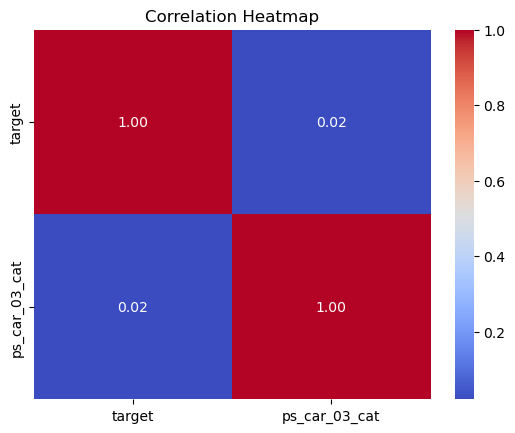

array([0, 1], dtype=int64)

In [151]:
correlation_matrix = df_rowswith_car03[['target', 'ps_car_03_cat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df_rowswith_car03['ps_car_03_cat'].unique()

0.02 = Very weak + or no association, can remove the column ps_car_03_cat

Tradeoff: almost none, since all the target=1 rows are not deleted, and ps_car_03_cat has no predictive power for target=1

And 'array([0, 1], dtype=int64' is the reason to do correlation matrix before encoding this categorical feature, since it's already encoded in there's no third element

In [153]:
df_no_car03 = df_original.drop(columns= ['ps_car_03_cat'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_car03

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Drop rows missing ps_car_05_cat, or the column itself?
Check how many target=1 rows have values in ps_car_05_cat

In [155]:
df_rowswith_car05 = df_no_car03[df_no_car03['ps_car_05_cat']!=-1]
print(df_rowswith_car05.shape)
count_value_one_car05 = (df_rowswith_car05['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in ps_car_05_cat: {count_value_one_car05}")

(328661, 58)
Number of rows with value 1 in 'target' and value != Nulll in ps_car_05_cat: 13242


328661/595212 is about 0.55 = 1-0.45 = the rows which have values in  ps_car_05_cat

13242/328661 is about 0.04 these are the (rows with both target 1 and values in ps_car_05_cat) over (rows with values in ps_car_05_cat)

13242/595212 is about 0.022 out of the total number of rows

Only 3.78% of the rows in the total number of rows is labeled as 1

#### inference: the column ps_car_05_cat provide info for:
0.022/0.037 = 0.59 of the (target=1) rows of the dataset
##### Thus deleting these rows without values in ps_car_05 will delete 0.4 of the target =1 examples over (595212)

but if the rows without ps_car_05_cat are deleted, the ratio of target =1 over total rows = (13242/328661)*100 = 4.03%, 
higher than the original Only 3.78% of the rows in the total number of rows is labeled as 1

Examine the correlation between target and ps_car_05_cat in the subset:

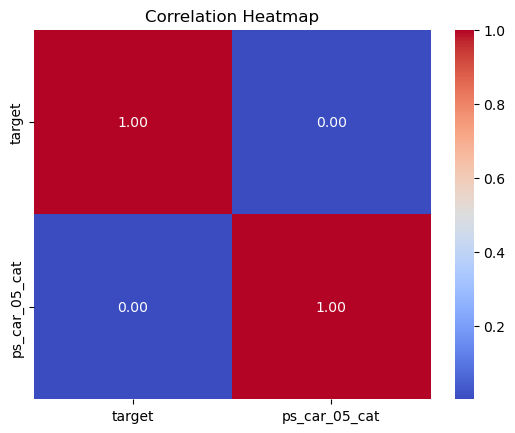

array([1, 0], dtype=int64)

In [157]:
correlation_matrix = df_rowswith_car05[['target', 'ps_car_05_cat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df_rowswith_car05['ps_car_05_cat'].unique()

0.00 = Very weak + or no association, can remove the column ps_car_03_cat

If delete the rows

Tradeoff: although ps_car_05_cat has no predictive power for target = 1, but other columns may have, and although deleting the rows will increase the ratio of target = 1 from 3.78% to 4.03%, this will result in the loss of other information

And 'array([1, 0], dtype=int64' is the reason to do correlation matrix before encoding this categorical feature, since it's already encoded in there's no third element

#####  'although ps_car_05_cat has no predictive power for target = 1'
This means we can delete column ps_car_05_cat, even though (100-44.78) of the rows have related data in this column

In [160]:
df_no_car0305 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_car0305

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,0,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,0,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,0,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### To simplify stuff, when decide should or shouldnt drop the column
1. Remove the rows with -1 in the respective column first
2. Check the correlation between target = 1 and the value in the column
3. Delete the column if the correlation is low

#### Drop rows missing ps_reg_03, or the column itself?
Check how many target=1 rows have values in ps_reg_03

In [163]:
df_rowswith_reg03 = df_no_car0305[df_no_car0305['ps_reg_03']!=-1]
print(df_rowswith_reg03.shape)
count_value_one_reg03 = (df_rowswith_reg03['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_reg03: {count_value_one_car05}")

(487440, 57)
Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_reg03: 13242


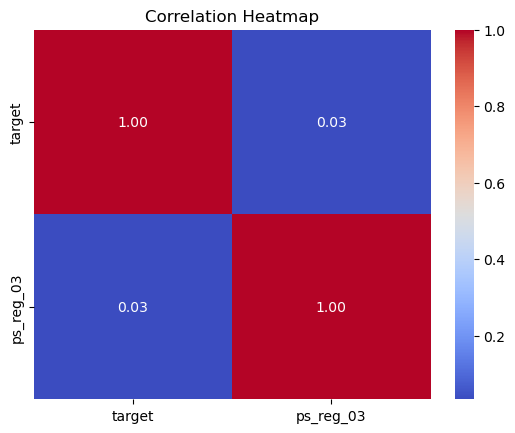

array([0.71807033, 0.5809475 , 2.33264871, ..., 1.61264534, 1.45859521,
       1.63075903])

In [164]:
correlation_matrix = df_rowswith_reg03[['target', 'ps_reg_03']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df_rowswith_car05['ps_reg_03'].unique()

0.03 = Very weak + or no association, can remove the column ps_reg_03

Tradeoff: almost none, since all the target=1 rows are not deleted, and ps_reg_03 has no predictive power for target=1

With original data as numerical data, can proceed directly with correlation matrix

In [166]:
df_no_car0305_reg03 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_car0305_reg03

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,10,1,0,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,7,1,0,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,11,1,0,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Drop rows missing ps_car_14, or the column itself?
Check how many target=1 rows have values in ps_car_14 

In [168]:
df_rowswith_car_14 = df_no_car0305_reg03[df_no_car0305_reg03['ps_car_14']!=-1]
print(df_rowswith_car_14.shape)
count_value_one_car_14 = (df_rowswith_car_14['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_car_14: {count_value_one_car_14}")

(552592, 56)
Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_car_14: 19971


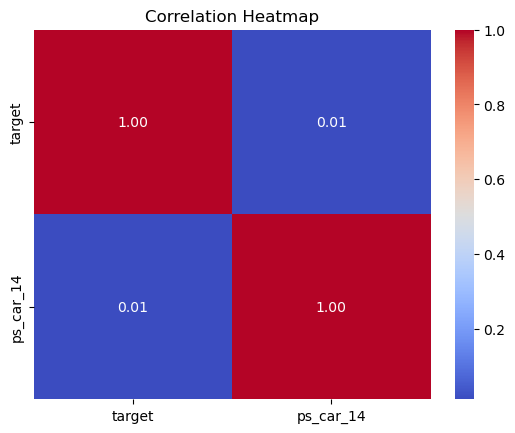

In [169]:
correlation_matrix = df_rowswith_car_14[['target', 'ps_car_14']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

0.03 = Very weak + or no association, can remove the column ps_car_14

Tradeoff: almost none, since all the target=1 rows are not deleted, and ps_car_14 has no predictive power for target=1

With original data as numerical data, can proceed directly with correlation matrix

In [171]:
df_no_car030514_reg03 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03','ps_car_14'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_car030514_reg03 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,10,1,0,1,1,1,0,1,31,3,0.374166,0.684631,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,7,1,0,1,1,1,2,1,31,3,0.397492,0.596373,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,11,1,0,11,1,1,2,1,101,3,0.374166,0.764434,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Drop rows missing ps_ind_05_cat, or the column itself?
Check how many target=1 rows have values in ps_ind_05_cat 

In [173]:
df_rowswith_ind_05 = df_no_car030514_reg03[df_no_car030514_reg03['ps_ind_05_cat']!=-1]
print(df_rowswith_ind_05.shape)
count_value_one_ind_05 = (df_rowswith_ind_05['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_car_14: {count_value_one_ind_05}")

(589403, 55)
Number of rows with value 1 in 'target' and value != Nulll in df_rowswith_car_14: 21210


In [174]:
df_rowswith_car05['ps_ind_05_cat'].unique()

array([ 0,  1,  3,  4,  6,  5, -1,  2], dtype=int64)

##### With original data as categorical data, must do encoding for this section first

In [176]:
df_rowswith_ind_05_enc = df_rowswith_ind_05[['target', 'ps_ind_05_cat']]
df_rowswith_ind_05_encoded = pd.get_dummies(df_rowswith_ind_05_enc, columns=['ps_ind_05_cat'], dtype=int)
df_rowswith_ind_05_encoded

,target,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
595207,0,1,0,0,0,0,0,0
595208,0,1,0,0,0,0,0,0
595209,0,1,0,0,0,0,0,0
595210,0,1,0,0,0,0,0,0


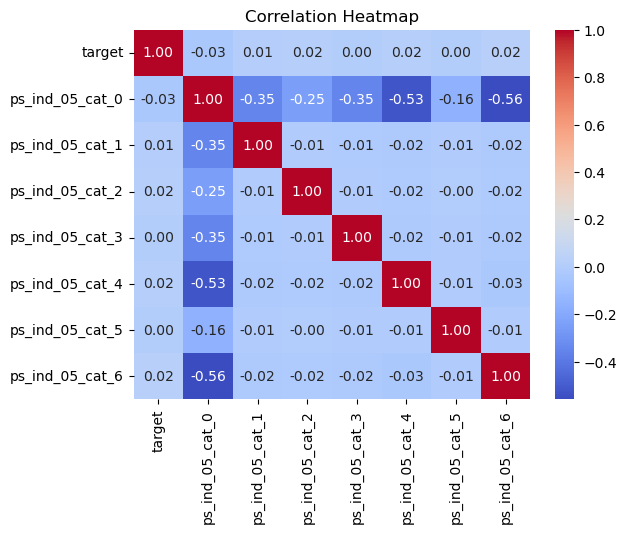

In [177]:
correlation_matrix = df_rowswith_ind_05_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

at most 0.03 = Very weak + or no association, can remove the column ps_ind_05_cat

Tradeoff: almost none, since all the target=1 rows are not deleted, and ps_ind_05_cat has no predictive power for target=1

-0.56 means cat_6 has the least number of 1, since cat_0 has the most number of 1

In [179]:
df_no_ind_05_car030514_reg03 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03','ps_car_14', 'ps_ind_05_cat'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_ind_05_car030514_reg03 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,10,1,0,1,1,1,0,1,31,3,0.374166,0.684631,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,9,1,0,15,0,0,2,1,63,2,0.387298,0.972145,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,7,1,0,1,1,1,2,1,31,3,0.397492,0.596373,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,11,1,0,11,1,1,2,1,101,3,0.374166,0.764434,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Drop rows missing ps_car_07_cat, or the column itself?
Check how many target=1 rows have values in ps_car_07_cat

In [181]:
df_rowswith_car07 = df_no_ind_05_car030514_reg03[df_no_ind_05_car030514_reg03['ps_car_07_cat']!=-1]
print(df_rowswith_car07.shape)
count_value_one_car07 = (df_rowswith_car07['target'] == 1).sum()
print(f"Number of rows with value 1 in 'target' and value != Nulll in ps_car_07_cat: {count_value_one_car07}")

(583723, 54)
Number of rows with value 1 in 'target' and value != Nulll in ps_car_07_cat: 20796


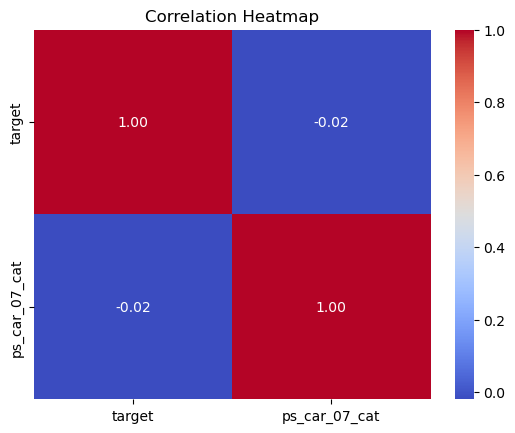

array([ 1, -1,  0], dtype=int64)

In [182]:
correlation_matrix = df_rowswith_car07[['target', 'ps_car_07_cat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df_rowswith_car05['ps_car_07_cat'].unique()

-0.02 = Very weak + or no association, can remove the column ps_car_07

Tradeoff: almost none, since all the target=1 rows are not deleted, and ps_car_07 has no predictive power for target=1

And 'array([0, 1], dtype=int64' is the reason to do correlation matrix before encoding this categorical feature, since it's already encoded in there's no third element

In [184]:
df_no_ind_05_car03050714_reg03 = df_original.drop(columns= ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03','ps_car_14', 'ps_ind_05_cat','ps_car_07_cat'], inplace=False)  # inplace=True modifies the DataFrame directly
df_no_ind_05_car03050714_reg03 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,0,4,0,0,1,12,2,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,0,11,1,2,1,19,3,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,0,14,1,2,1,60,1,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,11,1,3,1,104,1,0.374166,0.542949,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,0,14,1,2,1,82,3,0.316070,0.565832,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,10,1,0,1,1,0,1,31,3,0.374166,0.684631,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,9,1,0,15,0,2,1,63,2,0.387298,0.972145,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,7,1,0,1,1,2,1,31,3,0.397492,0.596373,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,11,1,0,11,1,2,1,101,3,0.374166,0.764434,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


#### Check missing value again:

In [186]:
columns = [
    'id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 
     'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
    'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 
    'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 
    'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 
    'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 
    'ps_car_13', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 
    'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 
    'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 
    'ps_calc_19_bin', 'ps_calc_20_bin'
]

total_rows_with_minus_one = 0

for i in columns:
    rows_with_minus_one = (df_no_ind_05_car03050714_reg03[i] == -1) | (df_no_ind_05_car03050714_reg03[i] == float(-1)) | (df_no_ind_05_car03050714_reg03[i] == str(-1))
    num_rows = rows_with_minus_one.sum()
    total_rows_with_minus_one += num_rows
    print(f"Column: {i:20} | Rows with -1: {(num_rows/595212)*100}")
    
print(f"\nTotal rows with -1 across all columns: {total_rows_with_minus_one}")

Column: id                   | Rows with -1: 0.0
Column: target               | Rows with -1: 0.0
Column: ps_ind_01            | Rows with -1: 0.0
Column: ps_ind_02_cat        | Rows with -1: 0.036289590935666624
Column: ps_ind_03            | Rows with -1: 0.0
Column: ps_ind_04_cat        | Rows with -1: 0.013944611331760785
Column: ps_ind_06_bin        | Rows with -1: 0.0
Column: ps_ind_07_bin        | Rows with -1: 0.0
Column: ps_ind_08_bin        | Rows with -1: 0.0
Column: ps_ind_09_bin        | Rows with -1: 0.0
Column: ps_ind_10_bin        | Rows with -1: 0.0
Column: ps_ind_11_bin        | Rows with -1: 0.0
Column: ps_ind_12_bin        | Rows with -1: 0.0
Column: ps_ind_13_bin        | Rows with -1: 0.0
Column: ps_ind_14            | Rows with -1: 0.0
Column: ps_ind_15            | Rows with -1: 0.0
Column: ps_ind_16_bin        | Rows with -1: 0.0
Column: ps_ind_17_bin        | Rows with -1: 0.0
Column: ps_ind_18_bin        | Rows with -1: 0.0
Column: ps_reg_01            | Rows

In [187]:
df_rows_to_remove = df_no_ind_05_car03050714_reg03[(df_no_ind_05_car03050714_reg03 == -1).any(axis=1)]
display(df_rows_to_remove)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
56,144,0,0,2,5,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.4,0.2,3,1,0,1,1,-1,1,31,3,0.374166,0.697072,2.828427,0.0,0.9,0.8,3,1,9,5,10,2,13,3,0,2,4,0,1,0,0,1,0
146,389,0,0,1,1,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.1,0.2,9,0,0,4,1,-1,1,104,2,0.447214,1.086649,3.316625,0.4,0.7,0.4,3,4,8,3,8,1,6,2,4,2,9,0,0,1,0,1,0
847,2210,0,5,-1,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,-1,0,9,13,0,-1,1,104,3,0.565685,2.055264,3.605551,0.4,0.7,0.9,2,0,6,2,11,1,8,5,2,2,9,0,0,0,0,0,0
972,2519,0,0,1,5,0,1,0,0,0,0,0,0,0,0,7,0,0,0,0.9,0.2,11,1,8,14,0,-1,1,18,2,0.500000,1.282044,3.605551,0.0,0.8,0.0,3,3,10,2,9,2,10,10,1,2,13,0,1,0,0,0,0
1029,2682,0,3,1,4,1,0,1,0,0,0,0,0,0,0,3,0,1,0,0.8,0.3,7,0,8,13,0,-1,1,4,2,0.565685,1.611448,3.605551,0.1,0.0,0.7,3,3,8,5,12,2,5,9,0,0,7,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591394,1478237,0,0,-1,6,1,0,0,1,0,0,0,0,0,0,12,0,0,0,0.4,0.0,8,1,0,0,1,0,1,87,3,0.316228,0.711723,3.316625,0.4,0.1,0.3,1,1,7,2,10,1,3,8,3,4,9,0,1,0,0,0,0
591650,1478848,0,7,1,6,0,0,1,0,0,0,0,0,0,0,5,0,1,0,0.9,1.0,11,0,9,2,0,-1,1,104,3,0.447214,1.688561,3.741657,0.7,0.1,0.6,3,0,7,2,10,3,13,7,2,1,9,0,0,1,0,1,0
593468,1483561,1,7,1,6,1,0,1,0,0,0,0,0,0,0,5,1,0,0,0.9,1.0,11,0,0,6,1,-1,1,104,3,0.447214,1.055104,3.605551,0.0,0.6,0.1,3,1,8,2,8,5,13,6,1,3,6,0,1,0,0,0,0
593631,1483987,0,4,-1,6,1,0,0,0,1,0,0,0,0,0,13,1,0,0,0.9,1.3,6,1,0,1,1,0,1,70,3,0.374166,0.800103,3.316625,0.8,0.7,0.3,1,1,8,4,9,3,13,5,0,7,11,0,1,1,1,1,0


#### only 0.13% of the data has null values now, can consider removing rows

### remove rows

In [190]:
df_cleaned = df_no_ind_05_car03050714_reg03[(df_no_ind_05_car03050714_reg03 != -1).all(axis=1)]
df_cleaned

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,0,4,0,0,1,12,2,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,0,11,1,2,1,19,3,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,0,14,1,2,1,60,1,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,11,1,3,1,104,1,0.374166,0.542949,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,0,14,1,2,1,82,3,0.316070,0.565832,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,10,1,0,1,1,0,1,31,3,0.374166,0.684631,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,9,1,0,15,0,2,1,63,2,0.387298,0.972145,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,7,1,0,1,1,2,1,31,3,0.397492,0.596373,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,11,1,0,11,1,2,1,101,3,0.374166,0.764434,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [191]:
columns = [
    'id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 
     'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
    'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 
    'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 
    'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 
    'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 
    'ps_car_13', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 
    'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 
    'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 
    'ps_calc_19_bin', 'ps_calc_20_bin'
]

total_rows_with_minus_one = 0

for i in columns:
    rows_with_minus_one = (df_cleaned[i] == -1) | (df_cleaned[i] == float(-1)) | (df_cleaned[i] == str(-1))
    num_rows = rows_with_minus_one.sum()
    total_rows_with_minus_one += num_rows
    print(f"Column: {i:20} | Rows with -1: {(num_rows/595212)*100}")
    
print(f"\nTotal rows with -1 across all columns: {total_rows_with_minus_one}")

Column: id                   | Rows with -1: 0.0
Column: target               | Rows with -1: 0.0
Column: ps_ind_01            | Rows with -1: 0.0
Column: ps_ind_02_cat        | Rows with -1: 0.0
Column: ps_ind_03            | Rows with -1: 0.0
Column: ps_ind_04_cat        | Rows with -1: 0.0
Column: ps_ind_06_bin        | Rows with -1: 0.0
Column: ps_ind_07_bin        | Rows with -1: 0.0
Column: ps_ind_08_bin        | Rows with -1: 0.0
Column: ps_ind_09_bin        | Rows with -1: 0.0
Column: ps_ind_10_bin        | Rows with -1: 0.0
Column: ps_ind_11_bin        | Rows with -1: 0.0
Column: ps_ind_12_bin        | Rows with -1: 0.0
Column: ps_ind_13_bin        | Rows with -1: 0.0
Column: ps_ind_14            | Rows with -1: 0.0
Column: ps_ind_15            | Rows with -1: 0.0
Column: ps_ind_16_bin        | Rows with -1: 0.0
Column: ps_ind_17_bin        | Rows with -1: 0.0
Column: ps_ind_18_bin        | Rows with -1: 0.0
Column: ps_reg_01            | Rows with -1: 0.0
Column: ps_reg_02   

#### Cleaned the data XD

### Check for duplicates

In [194]:
duplicates = df_cleaned.duplicated()
print(duplicates.sum())

0


### Encode categorical data
Drop the first dummy variable to prevent correlation among features

In [196]:
columns = [
    'id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 
     'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
    'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 
    'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 
    'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 
    'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 
    'ps_car_13', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 
    'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 
    'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 
    'ps_calc_19_bin', 'ps_calc_20_bin'
]
# Identify categorical columns (those ending with '_cat')
categorical_cols = [col for col in df_cleaned.columns if col.endswith('_cat')]

# Apply One-Hot Encoding using pandas.get_dummies()
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True, dtype=int)

display(df_cleaned_encoded)

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_08_cat_1,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,2,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,3,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,1,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7

### Correlation analysis: to determine whether linear regression is suitable
Assumptions of linear regression:

Resources:

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/


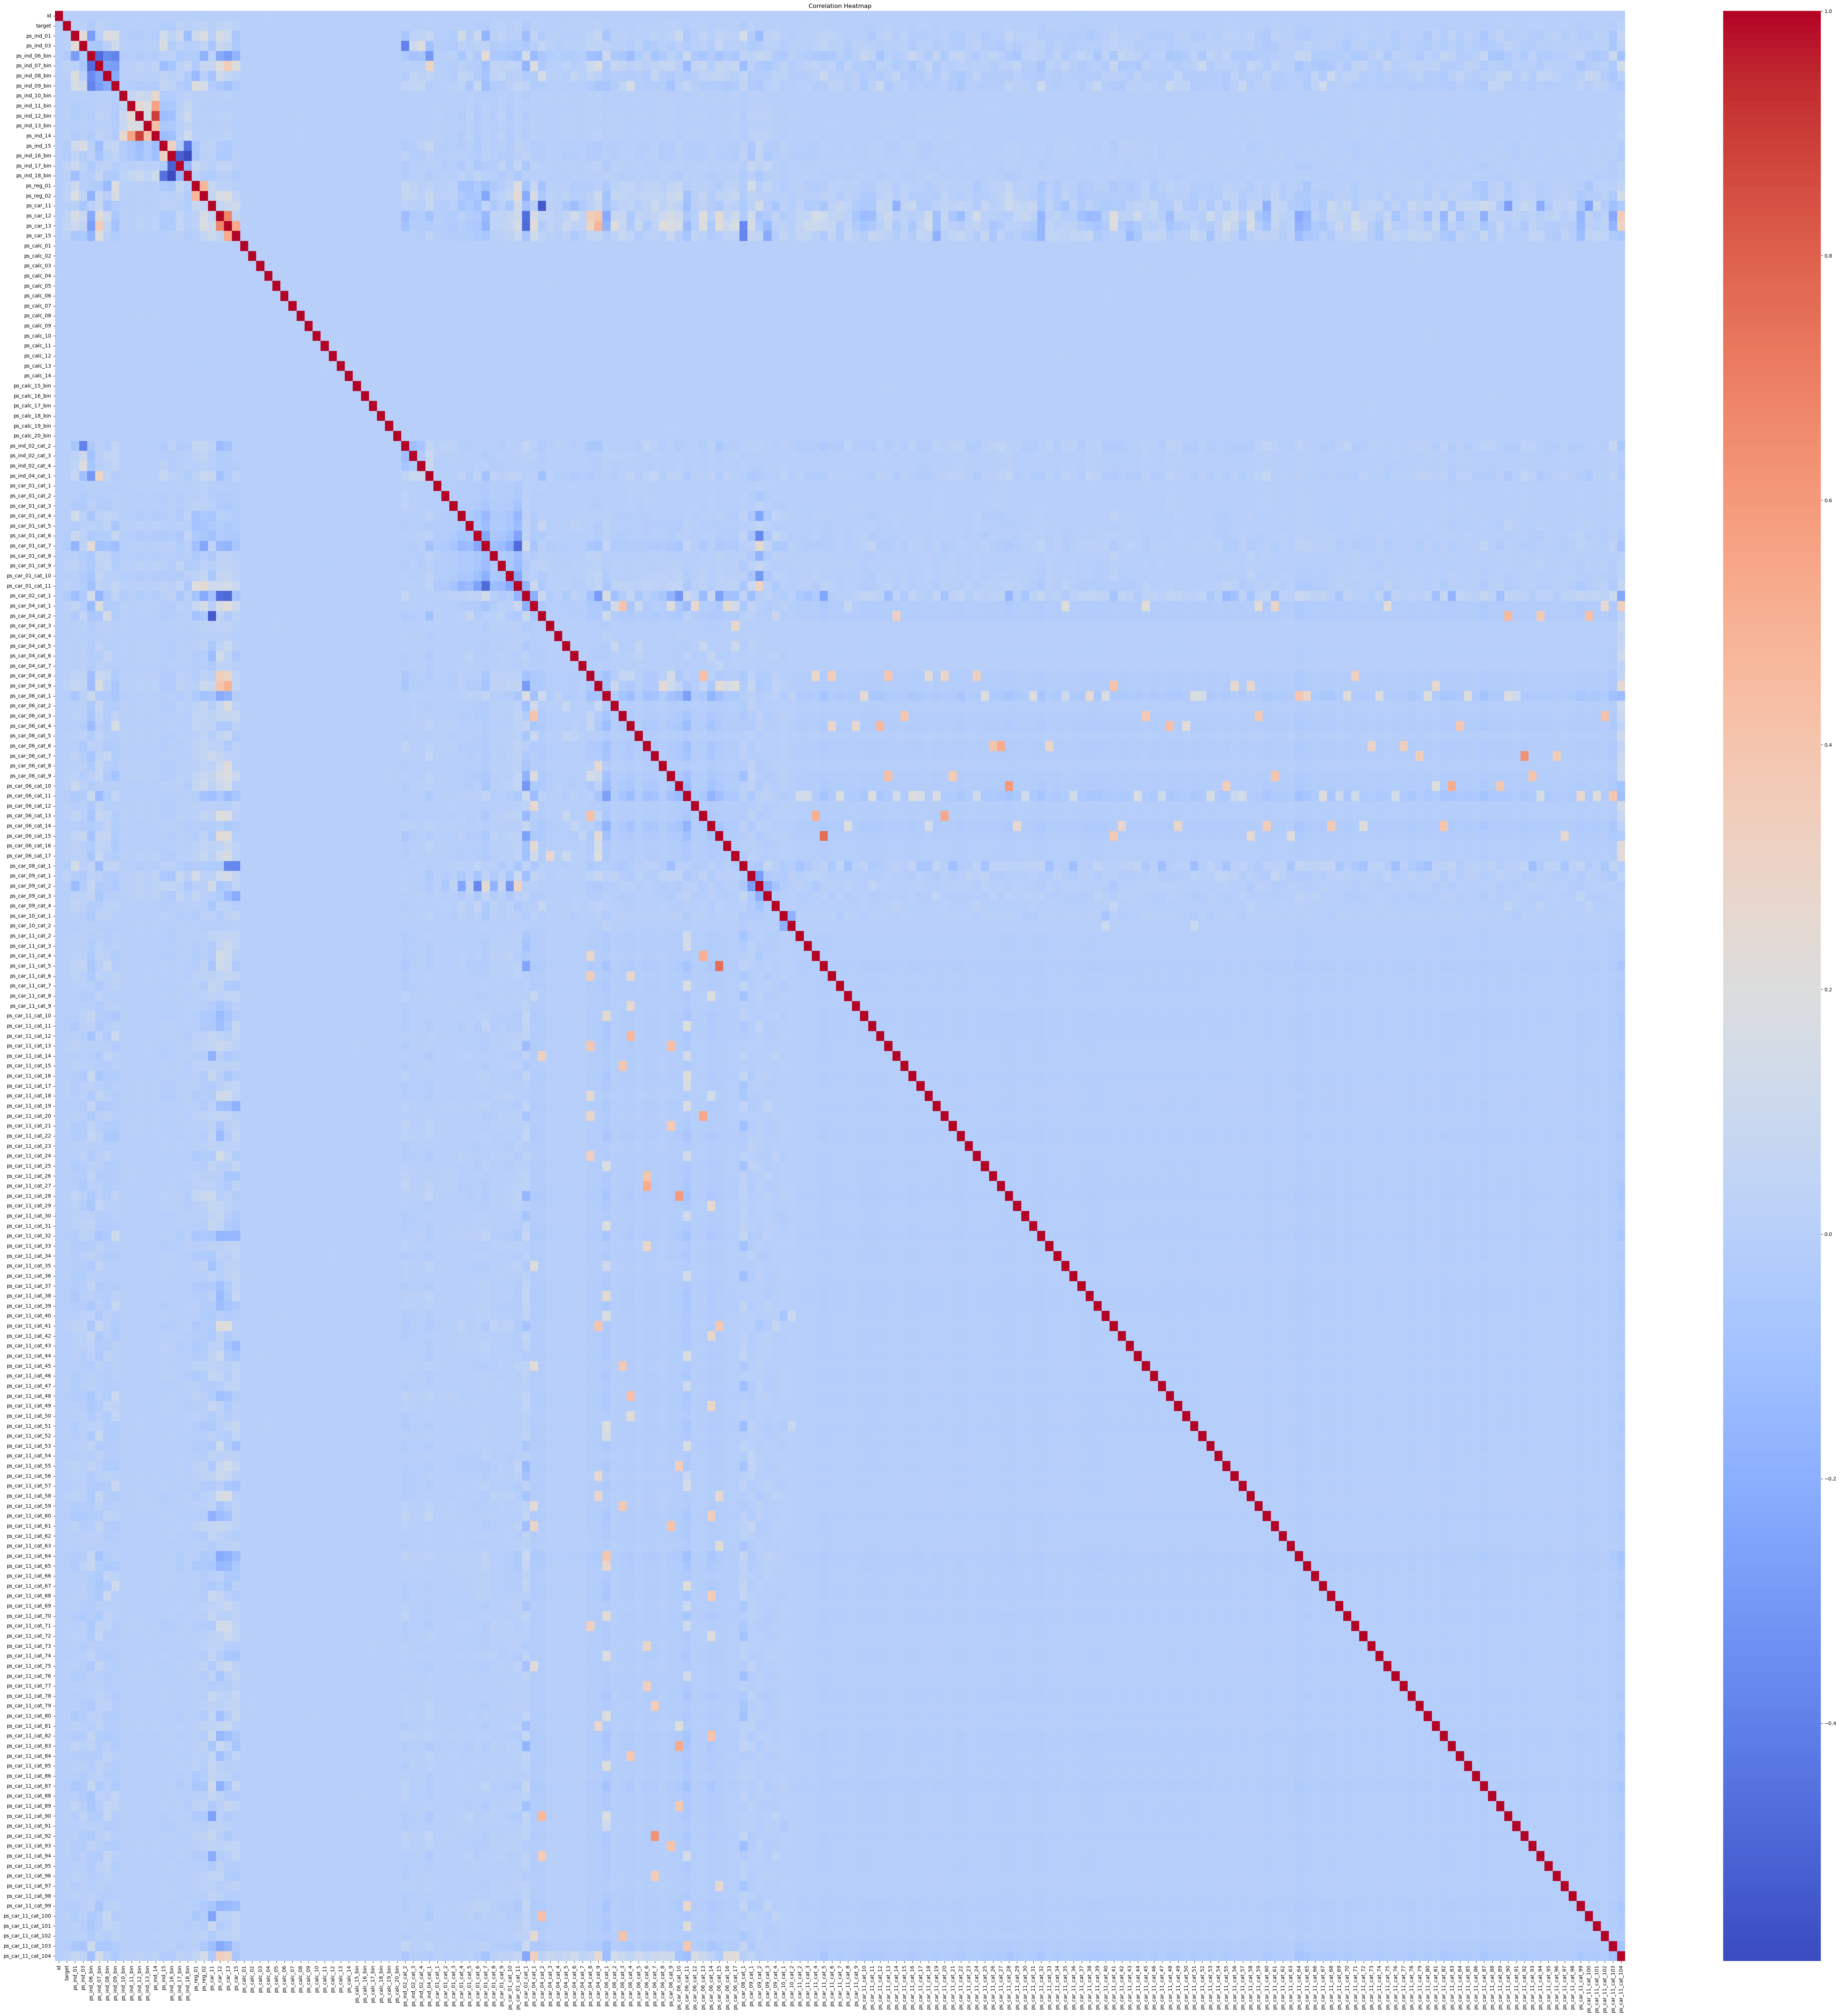

In [198]:
plt.figure(figsize=(70, 70))  # Adjust width and height as needed
correlation_matrix = df_cleaned_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Findings:
1. Target does not seems to have high correlation with any one of the features
2. Some features are highly correlated with one another and this may cause issue when analysing the weights, but it wont hurt if we just want to predict target

In [200]:
target_col = 'target'
feature_cols = [col for col in df_cleaned_encoded.columns if col != target_col]

# Calculate correlations
correlations = df_cleaned_encoded[feature_cols].corrwith(df_cleaned_encoded[target_col])

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Display the results
print("Feature Correlations with Target:")
print(sorted_correlations)

Feature Correlations with Target:
ps_car_13           0.053813
ps_car_12           0.038632
ps_ind_17_bin       0.036655
ps_reg_02           0.035105
ps_ind_07_bin       0.034273
                      ...   
ps_car_06_cat_6     0.000104
ps_car_11_cat_73    0.000088
ps_calc_06          0.000071
ps_car_11_cat_59    0.000051
ps_calc_07          0.000051
Length: 194, dtype: float64


##### Every feature has low correlation with target, and this is partially caused by the data being unbalanced
Proof: random sampling only 0.05% of target = 0 examples + every target = 1 examples yield higher correlation coefficients

In [202]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = df_cleaned_encoded[df_cleaned_encoded['target'] == 0]
minority_class = df_cleaned_encoded[df_cleaned_encoded['target'] == 1]

# Downsample the majority class (randomly keep 50%)
majority_downsampled = majority_class.sample(frac=0.05, random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df = pd.concat([majority_downsampled, minority_class])

# Shuffle the combined dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['target'].value_counts())

target
0    28641
1    21622
Name: count, dtype: int64


In [203]:
target_col = 'target'
feature_cols = [col for col in balanced_df.columns if col != target_col]

# Calculate correlations
correlations = balanced_df[feature_cols].corrwith(balanced_df[target_col])

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Display the results
print("Feature Correlations with Target:")
print(sorted_correlations)

Feature Correlations with Target:
ps_car_13           0.135016
ps_car_12           0.098989
ps_ind_17_bin       0.092500
ps_ind_06_bin       0.092491
ps_reg_02           0.090927
                      ...   
ps_car_11_cat_27    0.000497
ps_calc_10          0.000354
ps_car_11_cat_36    0.000317
ps_calc_01          0.000192
ps_car_11_cat_73    0.000078
Length: 194, dtype: float64


### Save the processed csv file
Since scaling has to be done after the splitting of data for linear regression, we will save the dataframe first

In [205]:
# Define the folder path and file name
folder_path = 'C:/Users/Dell/Desktop/Mlda/Pronova Project/'  # Replace with your desired folder path
file_name = 'sdptrain_cleaned_encoded.csv'

# Save the DataFrame to the specified path
df_cleaned_encoded.to_csv(f'{folder_path}{file_name}', index=False)